# Conditional Tabular GAN (CTGAN)

CTGAN es una variación de las **Redes Generativas Adversarias (GAN, por sus siglas en inglés)** especialmente diseñado para conjuntos de datos tabulares, una categoría que históricamente ha planteado desafíos significativos en el campo del aprendizaje automático generativo. Las redes antagónicas generativas o redes adversarias generativas (GANs) son un método para la optimización competitivo entre dos redes neuronales, una llamada generadora y otra discriminadora, con el objetivo de conseguir generar nuevas instancias idealmente indistinguibles a las pertenecientes a la distribución de probabilidad de la que derivan los datos de entrenamiento.

Las GANs, originalmente concebidas para tareas de síntesis de imágenes [[Goodfellow et al., 2014](https://doi.org/10.1145/3422622)], han demostrado en los últimos años una notable capacidad para modelar distribuciones complejas en espacios tabulares multivariantes, especialmente en dominios donde los datos reales son escasos o costosos de obtener. El fundamento teórico general del que derivan, permite su utilización para la generación de cualquier tipo de datos, habiéndose demostrado efectiva en campos diversos como son la visión por computador [[Roy et al., 2015](https://doi.org/10.48550/arXiv.1505.03906), [Karras et al., 2017](https://doi.org/10.48550/arXiv.1710.10196)], la segmentación semántica [[Hoffman et al., 2017](https://doi.org/10.48550/arXiv.1711.03213)], la síntesis de series temporales [[Hartmann et al., 2018](https://doi.org/10.48550/arXiv.1806.01875)], la edición de imagen [[Abdal et al., 2020](https://doi.org/10.1145/3447648)], el procesamiento del lenguaje natural [[Fedus et al., 2018](https://doi.org/10.48550/arXiv.1801.07736)], la generación de imagen a partir de texto [[Radford et al., 2021](https://doi.org/10.48550/arXiv.2103.00020)] y más recientemente [Xu et al. (2023)](https://doi.org/10.1007/s00778-023-00807-y) demuestran que las GANs superan a técnicas convencionales de síntesis en la preservación de estructuras de dependencia no lineal en variables tabulares reales de alta dimensión.

Para cualquier conjunto de datos, podemos hipotetizar que es posible definir una distribución de probabilidad $P_{data}$ representativa de la población representada por la muestra formada por el conjunto de datos. De ser esto posible, para cualquier valor de $x$ será posible establecer un valor $P_{data}(x)$ que determine la probabilidad de que $x$ pertenezca a la población. De existir una función de este tipo, sería una función discriminativa que dada una instancia permitiría conocer la probabilidad de pertenencia a la población. Los modelos generativos modelizan la distribución de probabilidad mencionada pero no proporcionan un valor de probabilidad, sino que generan instancias nuevas que pertenecen a distribuciones de probabilidad próximas a la que pretenden asemejar. Las GANs definen un esquema de aprendizaje que facilita la codificación de los atributos definitorios de la distribución de probabilidad en una red neuronal de manera que la red incorpore la información esencial que le permite generar instancias pertenecientes a distribuciones de probabilidad próximas a la que el conjunto de datos que pretende representar.

La arquitectura de las Redes Generativas Adversarias (GAN, por sus siglas en inglés) se basa en la interacción entre dos redes neuronales que trabajan de forma opuesta pero complementaria: una red generadora $(G)$ y una red discriminadora $(D)$. La red generadora tiene como objetivo crear datos sintéticos que imiten con la mayor fidelidad posible los datos reales del conjunto original. Por su parte, la red discriminadora actúa como un detector, cuya tarea es evaluar si una determinada entrada procede del conjunto de datos reales o ha sido generada artificialmente por $G$.

Durante el proceso de entrenamiento, ambas redes se enfrentan en un proceso competitivo. La generadora intenta “engañar” a la discriminadora creando datos cada vez más realistas, mientras que la discriminadora se entrena para detectar con mayor precisión las falsificaciones. Este enfoque adversarial permite que ambas redes mejoren progresivamente: $G$ produce datos sintéticos más convincentes y $D$ refina sus capacidades de detección. Esta dinámica se puede entender como un juego de suma cero, donde el éxito de una red implica el fracaso de la otra, y que teóricamente puede llevar a un punto en el que ninguna de las redes puede mejorar su rendimiento sin afectar negativamente a la otra (equilibrio de Nash).

```{figure} .././assets/Modelo_GAN.png
:name: Figura_2.1
:alt: Diagrama del proceso de entrenamiento de las redes adversarias generativas
:width: 100%
:align: center

Modelo funcional de una red GAN
```

En la figura se muestra un diagrama representativo del proceso de optimización de las GAN. La **red generadora** $G(z)$ recibe como entrada un vector de ruido aleatorio $z$, generado a partir de una distribución conocida $p_z$, y produce como salida un dato sintético $x_{fake}$ que intenta imitar los datos reales. La **red discriminadora** $D(x)$ recibe como entrada un dato $x_{real}$  o $x_{fake}$ (generado) y devuelve una probabilidad `D(x)` entre $0$ y $1$ que indica cuán probable es que $x$ provenga del conjunto real de datos.

Amabas redes se consideran antagónicas dado que sus objetivos son opuestos:

- $D$ quiere **maximizar** la probabilidad de detectar correctamente los datos reales y rechazar los sintéticos.
- $G$ quiere **minimizar** la probabilidad de que $D$ detecte que sus datos son falsos.

El proceso se modela como un **juego de suma cero** mediante la siguiente función objetivo:

$$
\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{\text{datos}}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]
$$

- El primer término recompensa a $D$ por identificar correctamente datos reales.
- El segundo término recompensa a $D$ por detectar correctamente los datos generados por $G$.

Mientras tanto, $G$ intenta minimizar esta función engañando a $D$, es decir, haciendo que $D(G(z))$ sea lo más cercano posible a 1.

Durante el entrenamiento, ambas redes mejoran iterativamente. Teóricamente, el proceso puede converger a un **equilibrio de Nash**, en el que $G$ genera datos tan similares a los reales que $D$ no puede distinguir entre ellos, y devuelve aproximadamente:

$$
D(x) \approx 0.5
$$

En ese punto, el sistema ha alcanzado un equilibrio: ni $G$ ni $D$ pueden mejorar sin perjudicar a la otra red.

El modelo CTGAN (Conditional Tabular GAN) representa un enfoque avanzado de generación de datos sintéticos específicamente diseñado para conjuntos de datos tabulares, una categoría que históricamente ha planteado desafíos significativos en el campo del aprendizaje automático generativo. A diferencia de las GANs tradicionales, orientadas principalmente a la síntesis de datos en dominios estructurados como imágenes o secuencias temporales, los datos tabulares presentan heterogeneidad tipológica (variables continuas, categóricas y ordinales) y complejas dependencias estadísticas interatributo. CTGAN resuelve esta complejidad mediante una arquitectura condicional que permite preservar la distribución marginal y condicional de cada atributo, logrando generar muestras sintéticas estadísticamente similares y coherentes con los datos originales.

Al igual que las GAN, su diseño se basa en un esquema adversarial compuesto por dos redes neuronales: el generador, que crea datos sintéticos a partir de ruido aleatorio y vectores condicionales, y el discriminador, que evalúa la autenticidad de los datos. Una innovación clave de CTGAN es el uso estratégico de funciones de activación, particularmente ReLU (Rectified Linear Unit) y LeakyReLU, que optimizan el flujo de gradientes durante el entrenamiento.

En el **generador** se emplea ReLU, para promover una activación fuerte y directa.

```{admonition} ReLU ((Rectified Linear Unit)
La **función de activación `ReLU` (Rectified Linear Unit)** es una de las funciones no lineales más utilizadas en redes neuronales profundas debido a su simplicidad y eficacia computacional. Se define como $\text{ReLU}(x) = \max(0, x)$, lo que implica que las salidas negativas se eliminan (se convierten en cero) mientras que las positivas se mantienen sin alteración. Esta propiedad introduce no linealidad en la red neuronal, permite que las neuronas se activen solo cuando es necesario y, al mismo tiempo, evita problemas de saturación que se presentan en otras funciones. Sin embargo, `ReLU` puede presentar el problema del “apagado de neuronas” (dead neurons), cuando los valores de entrada son negativos de forma persistente, impidiendo que esas neuronas contribuyan al aprendizaje.
```

Por otro lado, el **discriminador** utiliza Leaky ReLU (que anula los valores negarios) para evitar el colapso de unidades activas y asegurar una mejor capacidad de detección de patrones tanto en regiones positivas como negativas del espacio de entrada.

```{admonition} Leaky ReLU
Leaky ReLU es una evolución de la función de activación ReLU especialmente orientada a solventar el problema de “apagado de neuronas” (dead neurons), cuando los valores de entrada son negativos de forma persistente, impidiendo que esas neuronas contribuyan al aprendizaje. Esta función introduce una variante al considerar una pequeña pendiente negativa para los valores menores que cero. Su definición es:

$$
\text{LeakyReLU}(x) =
\begin{cases}
x & \text{si } x \geq 0 \\
\alpha x & \text{si } x < 0
\end{cases}
$$

donde $\alpha$ es un pequeño valor positivo, típicamente $0.01$. Esta modificación permite que las neuronas continúen actualizando sus pesos incluso cuando sus entradas son negativas, lo que favorece una mejor propagación del gradiente durante el entrenamiento y mejora la robustez de la red.

```

Tanto el generador como el discriminador de la red CTGAN están compuestos por **cuatro capas ocultas densamente conectadas** (*fully connected layers*) con **64 neuronass** que responden a un compromiso técnico entre capacidad representacional, estabilidad del entrenamiento y eficiencia computacional, especialmente en el contexto de modelos generativos aplicados a datos tabulares de baja dimensionalidad, como es el caso de las variables morfométricas (longitud, anchura, altura y peso) de juveniles de peces.

Desde un punto de vista práctico, 64 unidades por capa ofrecen una capacidad suficiente para capturar relaciones no lineales complejas entre las variables del espacio latente y las características morfológicas de salida, sin llegar a una sobreparametrización excesiva que pueda inducir sobreajuste o inestabilidad adversarial durante el entrenamiento de la GAN. Esta elección proporciona un número razonable de parámetros entrenables, lo cual resulta adecuado cuando se trabaja con conjuntos de datos de tamaño moderado, como ocurre en nuestro caso.

A este respecto, estudios recientes sobre GANs para datos tabulares —como CTAB-GAN+ [[Zao et al., 2024](https://doi.org/10.3389/fdata.2023.1296508)] y CTGAN [[Liu et al., 2023](https://doi.org/10.1007/s00778-023-00807-y)]— concluyen que arquitecturas con capas ocultas de entre 64 y 128 neuronas suelen alcanzar un buen equilibrio entre precisión, velocidad de convergencia y estabilidad del discriminador. Por debajo de este umbral (p.e., 16 o 32 neuronas), se puede observar pérdida de capacidad expresiva, mientras que valores superiores (p.e., 256) pueden ser innecesarios para problemas con pocos atributos y generar ruido o fluctuaciones en el aprendizaje entre adversarios.

Metadatos cargados desde JSON.
Iniciando CTGAN...
Entrenando CTGAN (esto puede tardar varios minutos)...
Generando datos sintéticos


,Peso (g),Longitud (cm),Anchura (cm),Altura (cm)
0,4.55,7.3,1.6,0.5
1,10.05,10.3,2.8,0.6
2,2.72,11.2,5.1,0.6
3,6.24,7.3,1.6,0.3
4,3.33,7.2,4.7,0.4
5,11.56,7.9,1.1,0.3
6,4.37,11.4,1.8,0.4
7,2.00,5.3,2.2,0.5
8,0.92,9.5,2.5,0.4
9,1.47,7.7,2.5,0.4


Se muestran 10 primeros registros sintéticos CTGAN de un total de 500

DIAGNÓSTICO BÁSICO CALIDAD DATOS

          Column             Metric  Score
0       Peso (g)  BoundaryAdherence    1.0
1  Longitud (cm)  BoundaryAdherence    1.0
2   Anchura (cm)  BoundaryAdherence    1.0
3    Altura (cm)  BoundaryAdherence    1.0


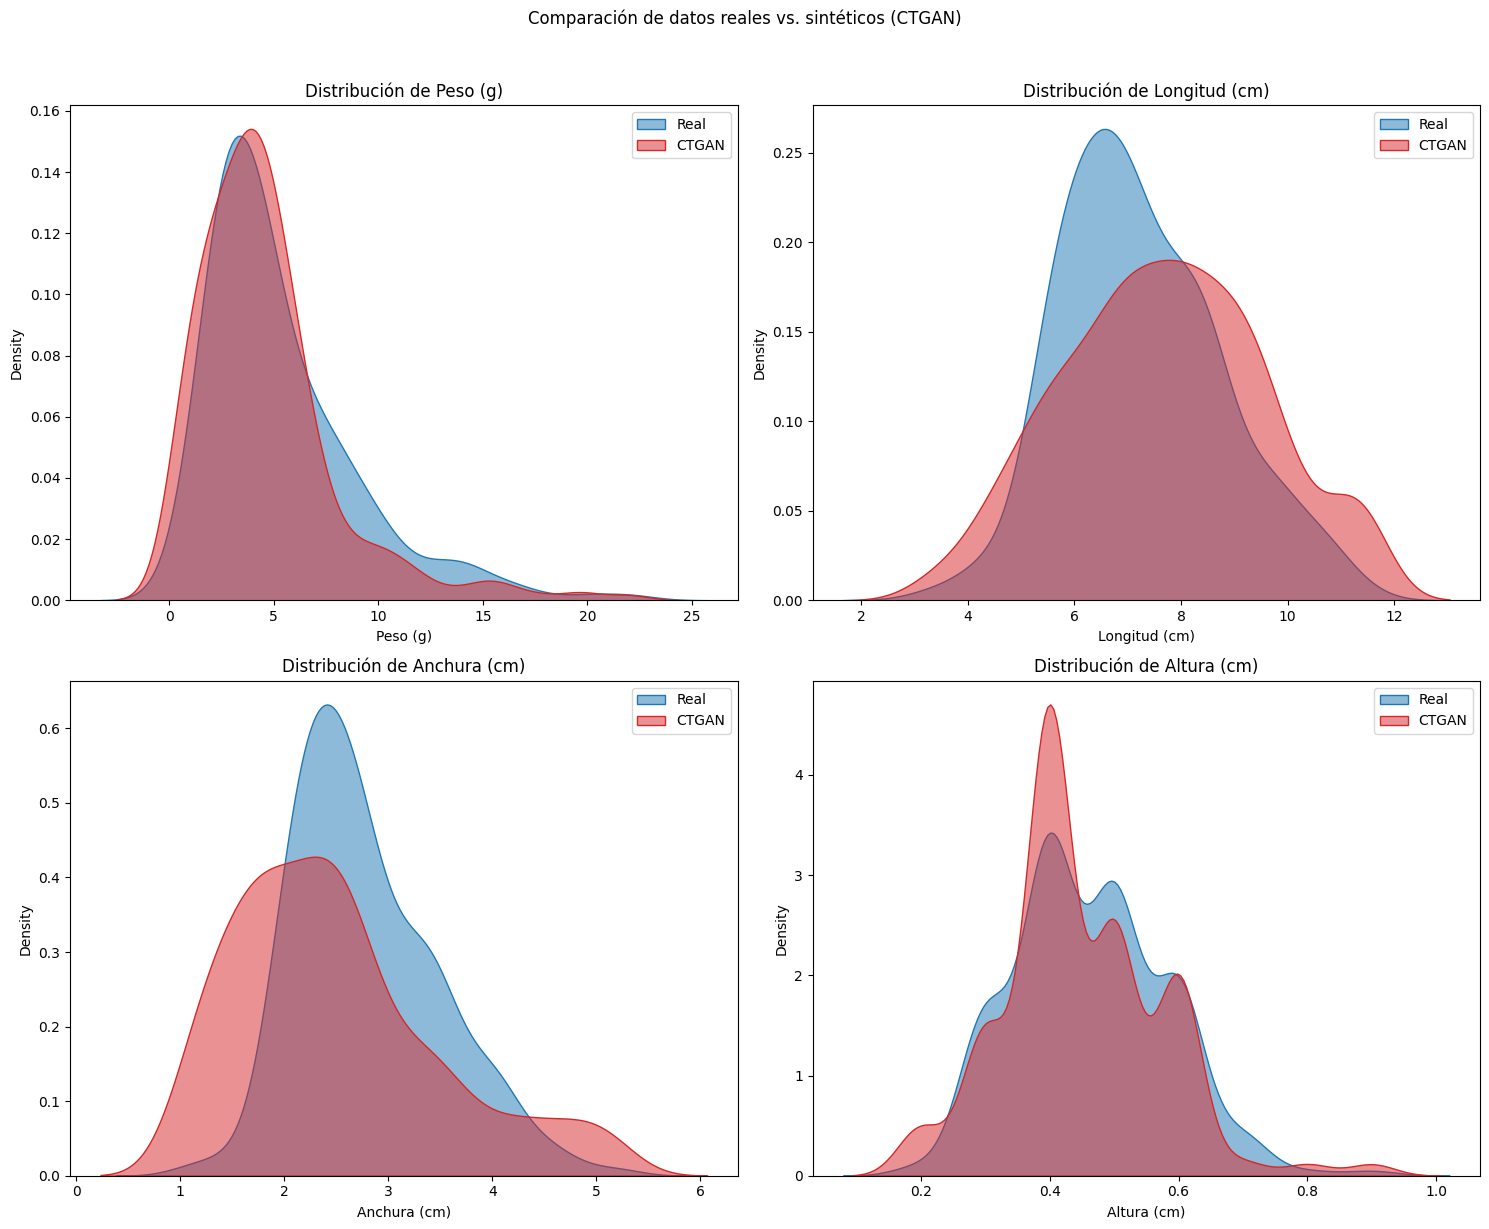


SIMILITUD ESTADÍSTICA

Overall score: 71.38%



In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from pathlib import Path
from myst_nb import glue

num_synthetic = 500 #variable para definir el número de registros sintéticos

# 1. Cargar datos reales
#--------------------------
path_realData = '.././data/Dimensiones_lenguado.xlsx'  
real_data = pd.read_excel(path_realData)

# 2. Obtener los metadata del dataset
#--------------------------------------

metadata_path = Path('.././data/metadata_lenguado.json')

if metadata_path.exists():
    # Cargar metadatos desde el JSON (evita el warning)
    metadata = Metadata.load_from_json(metadata_path)
    print("Metadatos cargados desde JSON.")
else:
    # Detectar metadatos y guardarlos en JSON para futuras ejecuciones
    metadata = Metadata.detect_from_dataframe(real_data)
    metadata.save_to_json(metadata_path)
    print("Metadatos detectados y guardados en JSON.")

# 3. Entrenar la red CTGAN
#---------------------------
print("Iniciando CTGAN...")

synthesizer = CTGANSynthesizer(
    metadata = metadata,
    enforce_min_max_values = True, # Forzar datos realísticos
    enforce_rounding = True, # Redondeos automáticos
    epochs = 500,
    verbose = True
);

# 4. Generar datos sintéticos
#---------------------------
import contextlib
import io

print("Entrenando CTGAN (esto puede tardar varios minutos)...")

# Suprimir toda la salida estándar para que no se vea al compilar
with contextlib.redirect_stdout(io.StringIO()):
    with contextlib.redirect_stderr(io.StringIO()):
        synthesizer.fit(real_data);


print("Generando datos sintéticos")
syntheticGAN_data = synthesizer.sample(num_rows=num_synthetic);
display(syntheticGAN_data.head(10))
print(f"Se muestran 10 primeros registros sintéticos CTGAN de un total de {num_synthetic}")

# 5. Guardar satos sintéticos
#---------------------------

path_syntheticCTGANData = ".././data/SyntheticCTGAN.xlsx"
syntheticGAN_data.to_excel(path_syntheticCTGANData, index=False, engine='openpyxl')

# 6. Validación calidad datos sintéticos
#---------------------------

from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

## Diagnóstico básico
diagnostic = run_diagnostic(real_data, syntheticGAN_data, metadata, False)

print("\nDIAGNÓSTICO BÁSICO CALIDAD DATOS\n")
print(diagnostic.get_details(property_name='Data Validity'))

## Visualización de datos
from sdv.evaluation.single_table import get_column_plot
import seaborn as sns

columnas = ["Peso (g)", "Longitud (cm)", "Anchura (cm)", "Altura (cm)"]

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
for i, col in enumerate(columnas):
    ax = axs[i//2, i%2]
    sns.kdeplot(real_data[col], ax=ax, color="#1f77b4", label="Real", fill=True, alpha=0.5)
    sns.kdeplot(syntheticGAN_data[col], ax=ax, color="#d62728", label="CTGAN", fill=True, alpha=0.5)
    ax.set_title(f'Distribución de {col}')
    ax.legend()
plt.suptitle('Comparación de datos reales vs. sintéticos (CTGAN)', y=1.02)
plt.tight_layout()
plt.show()

## Medidas de similiud estadística

quality_reportGAN = evaluate_quality(real_data, syntheticGAN_data.sample(n=len(real_data), random_state=42), metadata, False)

## Obtenemos el valor promedio de la similitud
overall_scoreGAN = f"{quality_reportGAN.get_score()*100:.2f}%"
glue("scoreGAN", overall_scoreGAN, display=False); # Definimos una variable para usar en el texto markdown
print("\nSIMILITUD ESTADÍSTICA\n")
print(f"Overall score: {overall_scoreGAN}\n")

In [5]:
print("\n Distribuciones individuales real vs. sintética\n")
print(quality_reportGAN.get_details('Column Shapes'))


 Distribuciones individuales real vs. sintética

          Column        Metric     Score
0       Peso (g)  KSComplement  0.861244
1  Longitud (cm)  KSComplement  0.818182
2   Anchura (cm)  KSComplement  0.626794
3    Altura (cm)  KSComplement  0.899522


In [6]:
print("\n Correlaciones entre variables real vs. sintética\n")
print(quality_reportGAN.get_details('Column Pair Trends'))


 Correlaciones entre variables real vs. sintética

        Column 1       Column 2                 Metric     Score  \
0       Peso (g)  Longitud (cm)  CorrelationSimilarity  0.660022   
1       Peso (g)   Anchura (cm)  CorrelationSimilarity  0.595531   
2       Peso (g)    Altura (cm)  CorrelationSimilarity  0.561942   
3  Longitud (cm)   Anchura (cm)  CorrelationSimilarity  0.728965   
4  Longitud (cm)    Altura (cm)  CorrelationSimilarity  0.572555   
5   Anchura (cm)    Altura (cm)  CorrelationSimilarity  0.579820   

   Real Correlation  Synthetic Correlation  
0          0.932951               0.252995  
1          0.942354               0.133416  
2          0.861768              -0.014348  
3          0.936674               0.394603  
4          0.870165               0.015276  
5          0.842673               0.002312  


Como se puede deducir de las tablas anteriores, la generación de datos sintéticos mediante **CTGAN proporciona unas métricas mucho más pobres** que las obtenidas con el método Gaussian Copula, con una baja correlación con los datos reales y en consecuencia **invalidando los registros sintéticos obtenidos** de peso, longitud, anchura y altura.